## **LINEAR REGRESSION MODEL**

In this analysis, I will create a linear regression model that will look at the relationship between a student's SAT scores and the GPA. I got the dataset from Kaggle with the following link https://www.kaggle.com/datasets/japondo/simple-linear-regression?rvi=1

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# import dataset
dataset = pd.read_csv("Simple linear regression.csv")
dataset.head(5)

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [3]:
# describe dataset
dataset.describe()

,SAT,GPA
count,100.000000,100.000000
mean,1850.760000,3.360500
std,101.566331,0.258845
min,1634.000000,2.400000
25%,1776.500000,3.270000
50%,1850.000000,3.410000
75%,1934.000000,3.520000
max,2050.000000,3.810000


In [4]:
# check missing value
dataset.isnull().sum()

SAT    0
GPA    0
dtype: int64

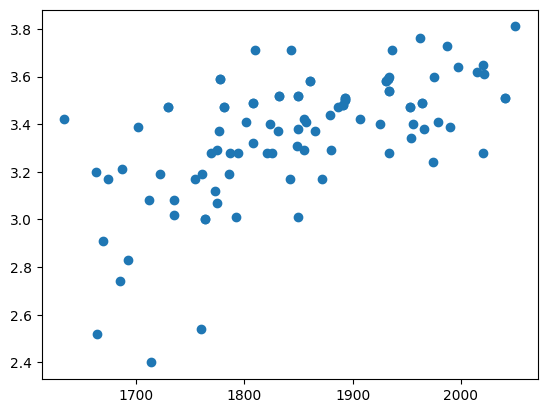

In [5]:
# visualized scatter
plt.scatter(dataset['SAT'], dataset['GPA'])

In [22]:
# check outlier with IQR
q1 = dataset['SAT'].quantile(0.25)
q3 = dataset['SAT'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

upper_array = np.where(dataset['SAT'] >= upper_bound)[0]
lower_array = np.where(dataset['SAT'] <= lower_bound)[0]

# Removing the outliers
dataset.drop(index=upper_array, inplace=True)
dataset.drop(index=lower_array, inplace=True)
 
# Print the new shape of the DataFrame
print("New Shape: ", dataset.shape)

New Shape:  (100, 2)


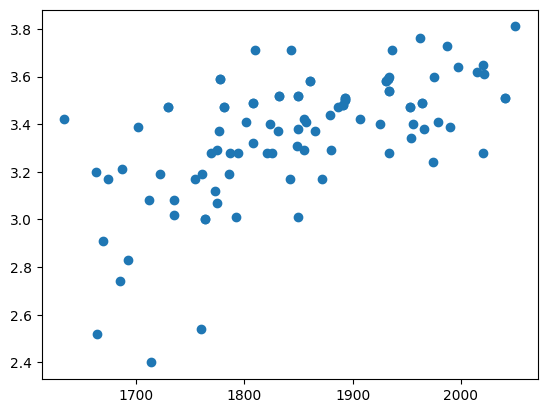

In [7]:
# check scatter after outlier checking
plt.scatter(dataset['SAT'], dataset['GPA'])

### **MAKE MODEL**

In [12]:
# membagi dataset
X = dataset['SAT']
x = X.values.reshape(-1, 1)
y = dataset['GPA']

In [13]:
# split dataset 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
# deklarasi model
model = LinearRegression()

In [15]:
# train model
model.fit(x_train, y_train)

LinearRegression()

In [16]:
# predict model
y_pred = model.predict(x_test)

In [19]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.06074431276064028

Text(0.5, 1.0, 'Regression SAT Score and GPA')

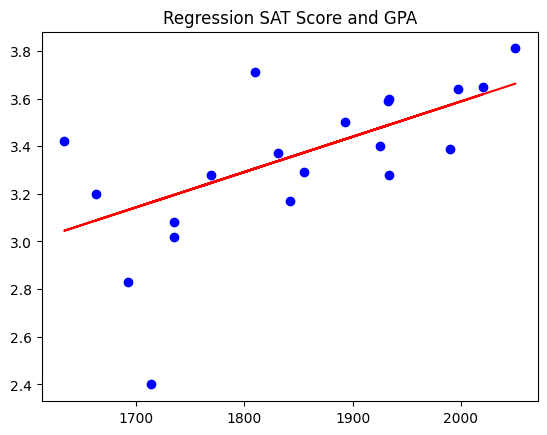

In [20]:
# visualization
plt.scatter(x_test, y_test, label='Data', color='blue')
plt.plot(x_test, y_pred, label='Predict', color='red')
plt.title('Regression SAT Score and GPA')

In [24]:
# insert SAT score that you want to predict
model.predict([[2000]])

array([3.58797576])